1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [31]:
link= 'https://www.amazon.in/OnePlus-Nord-Charcoal-128GB-Storage/product-reviews/B09576CYNP/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [32]:
page = requests.get(link)

In [33]:
page

<Response [200]>

In [34]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41SIz69qHYL.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31ZcpBfSgNL.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [ ]:
soup = bs(page.content,"html.parser")

In [38]:
names = soup.find_all('span', class_='a-profile-name')

In [39]:
names

[<span class="a-profile-name">Rohit M</span>,
 <span class="a-profile-name">vikas</span>,
 <span class="a-profile-name">vikas</span>,
 <span class="a-profile-name">Verified buyer</span>,
 <span class="a-profile-name">Rohit M</span>,
 <span class="a-profile-name">Omar khan</span>,
 <span class="a-profile-name">Subhrajit Pyne</span>,
 <span class="a-profile-name">Sunil Pareek</span>,
 <span class="a-profile-name">sayyad awez</span>,
 <span class="a-profile-name">Mr KK</span>,
 <span class="a-profile-name">Dhiren Punjabi</span>,
 <span class="a-profile-name">Deepak panwar</span>]

In [42]:
cust_name= []
for i in range(0,len(names)):
  cust_name.append(names[i].get_text())
cust_name

['Rohit M',
 'vikas',
 'vikas',
 'Verified buyer',
 'Rohit M',
 'Omar khan',
 'Subhrajit Pyne',
 'Sunil Pareek',
 'sayyad awez',
 'Mr KK',
 'Dhiren Punjabi',
 'Deepak panwar']

In [43]:
cust_name.pop(0)

'Rohit M'

In [44]:
cust_name.pop(0)

'vikas'

In [47]:
# extracting Review Title
title = soup.find_all('a',class_='review-title-content')
title

[<a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R2V2D0T16430R1?ASIN=B09576CYNP">
 <span>Bakwas phone</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R1KCVOUGOXK8DP?ASIN=B09576CYNP">
 <span>After replacement..now better</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R30NDCLLGX43XV?ASIN=B09576CYNP">
 <span>Good overall</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-hook="review-title" href="/gp/customer-reviews/R3GK8JWS2GTDPH?ASIN=B09576CYNP">
 <span>Worst phone in this segment</span>
 </a>,
 <a class="a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold" data-ho

In [48]:
review_title= []
for i in range(0,len(title)):
  review_title.append(title[i].get_text())
review_title

['\nBakwas phone\n',
 '\nAfter replacement..now better\n',
 '\nGood overall\n',
 '\nWorst phone in this segment\n',
 '\nSmooth user experience\n',
 '\nthe best 🤞\n',
 '\nBest under 25k range\n',
 '\nGreat phone\n',
 '\nBuy if software performance matters most to you.\n',
 '\nGreat product and good good service by amazon\n']

In [49]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]

In [51]:
# Extracting Ratings
rating = soup.find_all('i',class_='review-rating')

In [62]:
rate= []
for i in range(2,len(rating)):
      rate.append(rating[i].get_text())
rate

['1.0 out of 5 stars',
 '3.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars',
 '5.0 out of 5 stars']

In [57]:
#Extracting Content of review
review = soup.find_all("span",{"data-hook":"review-body"})

In [58]:
review_content = []
for i in range(0,len(review)):
      review_content.append(review[i].get_text())

In [59]:
review_content

['\n\n  Bakwas phone\n\n',
 "\n\n  Few issues are resolved that are mention below..but still this mobile hasn't the charm of OnePlus..It is like a normal android..not an OnePlus..Low processing, Exceptional features of OnePlus are not there in this phone..Took so long time to delete items..Battery is draining fast..Charging is not as fast as claimed..Earlier I was using OnePlus 5T..I bought it to upgrade but unfortunately it degrades...\n\n",
 "\n\n  The best part of the phone is it's super simple and user friendly operating system. Camera doesn't oversaturate colours and captures decent photos. Battery charging is super fast. People argue that this is overpriced in this segment but I guess ease of using the phone and mainly the OS wouldn't be so good in other comparable phones. It is super light and handy.Edit: taking away 1 star from the review after a month's usage.Phone app lags all the time. Phone starts ringing when I receive a call while the name of caller appears 5 seconds late

In [60]:
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]

In [ ]:
cust_name
review_title
rate
review_content

In [63]:
df = pd.DataFrame()
df['Cust_Name'] = cust_name
df['Title'] = review_title
df['Rating'] = rate
df['Comments'] = review_content

In [64]:
df.head()

Cust_Name  ...                                           Comments
0           vikas  ...                                       Bakwas phone
1  Verified buyer  ...    Few issues are resolved that are mention bel...
2         Rohit M  ...    The best part of the phone is it's super sim...
3       Omar khan  ...    Phone looks good but features are 10k phoneC...
4  Subhrajit Pyne  ...    Performance is really good - no lags at allP...

[5 rows x 4 columns]

In [65]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [67]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [68]:
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

In [69]:
# clean text data
df["Comments"] = df["Comments"].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df.head(5)

Cust_Name  ...                                           Comments
0           vikas  ...                                       bakwas phone
1  Verified buyer  ...  issue resolve mention below..but still mobile ...
2         Rohit M  ...  best part phone super simple user friendly ope...
3       Omar khan  ...  phone look good feature phonecamera worstperfo...
4  Subhrajit Pyne  ...  performance really good lag allperfectly smoot...

[5 rows x 4 columns]

In [70]:
#  add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [71]:
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [72]:
df

Cust_Name                                   Title  ...    pos compound
0           vikas                            bakwas phone  ...  0.000   0.0000
1  Verified buyer                   replacement..now good  ...  0.198   0.3182
2         Rohit M                            good overall  ...  0.314   0.9666
3       Omar khan                     worst phone segment  ...  0.467   0.7845
4  Subhrajit Pyne                  smooth user experience  ...  0.327   0.9682
5    Sunil Pareek                                    best  ...  0.281   0.8934
6     sayyad awez                              best range  ...  0.607   0.9313
7           Mr KK                             great phone  ...  0.321   0.6369
8  Dhiren Punjabi         buy software performance matter  ...  0.492   0.9648
9   Deepak panwar  great product good good service amazon  ...  0.804   0.6249

[10 rows x 8 columns]

In [73]:
# add number of characters column
df["nb_chars"] = df["Comments"].apply(lambda x: len(x))

In [74]:
# add number of words column
df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))

In [75]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [76]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comments"].apply(lambda x: x.split(" ")))]

In [77]:
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [78]:
# transform each Comment into a vector data
doc2vec_df = df["Comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [79]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df["Comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allwords = " ".join([twts for twts in df["Comments"]])

In [96]:
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(allwords)

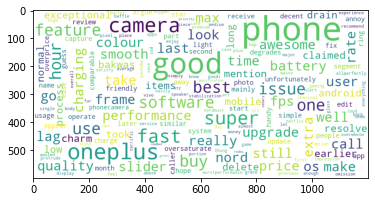

In [97]:
plt.imshow(wordcloud)
plt.show()
show_wordcloud(df["Comments"])
show_wordcloud(df["Title"])

In [99]:
# highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)

Comments    pos
6  awesome phone amaze camera well nord charcoal ...  0.607
8  far good omission alert slider baffle everythi...  0.492
3  phone look good feature phonecamera worstperfo...  0.467
4  performance really good lag allperfectly smoot...  0.327
7  awesome phone price.....camera feature good pr...  0.321
2  best part phone super simple user friendly ope...  0.314
5  first impression overwhelm major upgrade last ...  0.281
1  issue resolve mention below..but still mobile ...  0.198

In [100]:
# lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)

Comments    neg
1  issue resolve mention below..but still mobile ...  0.140
7  awesome phone price.....camera feature good pr...  0.128
2  best part phone super simple user friendly ope...  0.089
5  first impression overwhelm major upgrade last ...  0.039
4  performance really good lag allperfectly smoot...  0.036
3  phone look good feature phonecamera worstperfo...  0.000
6  awesome phone amaze camera well nord charcoal ...  0.000
8  far good omission alert slider baffle everythi...  0.000